In [1]:
# import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

# Loading required packages
import spacy
import pandas as pd
import re
# import gensim
# import gensim.downloader
# from gensim.models import Word2Vec
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
# from gensim.models.phrases import Phrases, Phraser
import nltk
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from statistics import mean
import json
import csv
import ast
import numpy as np

# from flair.embeddings import WordEmbeddings
# from flair.data import Sentence
# from flair.embeddings import TransformerWordEmbeddings

from tqdm import tqdm
import pickle 
# Set seed
seed = np.random.seed(1)


# Select Spacy model
# Efficiency
nlp = spacy.load("en_core_web_sm")

# Accuracy
# nlp = spacy.load("en_core_web_trf")

# Change working directory
# %cd '/Users/richardfrissen/Documents/Maastricht University/Thesis/Development/Datasets'

2021-07-27 17:03:45.824973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-27 17:03:45.825039: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
class_names=['Demographic and Racial language', 'Exclusive language', 'Feminine-coded words', 'LGBTQ-coloured language', 'Masculine-coded words', 'O']

In [3]:
%%time

# Optionally the data can be saved to create a checkpoint

# data.to_csv('data_features_full_wordembedding_glove.csv', index = False)

data = pd.read_csv('data_features_full_wordembedding_elmo.csv', nrows = 100000, na_values=['nan'])

data.head(10)

CPU times: user 34.5 s, sys: 2.5 s, total: 37 s
Wall time: 39.9 s


,Token,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,food,O,92,0,True,True,False,True,False,False,...,-0.362660,0.038647,-0.329854,0.507664,0.011485,-0.299479,-1.018636,1.331968,0.502126,-0.005587
1,a,O,90,0,True,True,False,True,False,False,...,0.136579,-0.087388,-0.565916,0.522235,-0.452233,-0.057982,-0.515886,0.859544,0.378656,0.303306
2,fast,O,86,0,True,True,False,True,False,False,...,-0.169968,0.237214,-0.226488,0.113207,-0.221394,0.119126,-0.395318,1.134955,-0.326653,0.157859
3,grow,O,100,0,True,True,False,True,False,False,...,0.004376,0.560592,-0.205904,0.210360,-0.490179,-0.910097,-0.732791,0.366863,0.584376,-0.171481
4,-winne,O,97,0,False,True,False,True,False,False,...,0.258308,-0.018983,-0.428032,0.907898,-0.095798,-0.122752,-0.746413,0.754866,0.268109,-0.523803
5,online,O,86,0,True,True,False,True,False,False,...,-0.244042,0.146873,-0.418024,0.068457,-0.217877,-0.220068,-0.674808,0.997628,0.111707,-0.457278
6,food,O,92,0,True,True,False,True,False,False,...,-0.365108,0.043319,-0.345948,0.509963,0.019733,-0.303730,-1.015588,1.334889,0.503644,-0.022480
7,community,O,92,0,True,True,False,True,False,False,...,1.109663,0.207417,0.261030,0.897862,-0.075947,-0.136039,-2.038073,0.420835,0.835099,-0.125490
8,and,O,89,0,True,True,False,True,False,False,...,-0.158997,-0.092389,-0.442418,-0.399130,-0.244655,-0.091644,-0.268837,0.890471,-0.268504,-0.128473
9,crowd,O,92,0,True,True,False,True,False,False,...,-0.280942,0.728471,0.065729,0.598478,-0.002546,0.173746,-1.592165,0.661048,0.177235,-0.713160


In [4]:
data["Label"] = data["Label"].astype('category').cat.codes

In [5]:
%%time

# Replace NaN values with a "0"

data = data.replace(np.nan, '0', regex=True)

# We drop the token, as it is no longer needed for prediction
data.drop('Token', axis=1, inplace=True)
data.head(10)

# data = data.stack().str.decode('utf-8').unstack()

CPU times: user 700 ms, sys: 391 ms, total: 1.09 s
Wall time: 1.1 s


,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,is_punct,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,5,92,0,True,True,False,True,False,False,False,...,-0.362660,0.038647,-0.329854,0.507664,0.011485,-0.299479,-1.018636,1.331968,0.502126,-0.005587
1,5,90,0,True,True,False,True,False,False,False,...,0.136579,-0.087388,-0.565916,0.522235,-0.452233,-0.057982,-0.515886,0.859544,0.378656,0.303306
2,5,86,0,True,True,False,True,False,False,False,...,-0.169968,0.237214,-0.226488,0.113207,-0.221394,0.119126,-0.395318,1.134955,-0.326653,0.157859
3,5,100,0,True,True,False,True,False,False,False,...,0.004376,0.560592,-0.205904,0.210360,-0.490179,-0.910097,-0.732791,0.366863,0.584376,-0.171481
4,5,97,0,False,True,False,True,False,False,False,...,0.258308,-0.018983,-0.428032,0.907898,-0.095798,-0.122752,-0.746413,0.754866,0.268109,-0.523803
5,5,86,0,True,True,False,True,False,False,False,...,-0.244042,0.146873,-0.418024,0.068457,-0.217877,-0.220068,-0.674808,0.997628,0.111707,-0.457278
6,5,92,0,True,True,False,True,False,False,False,...,-0.365108,0.043319,-0.345948,0.509963,0.019733,-0.303730,-1.015588,1.334889,0.503644,-0.022480
7,5,92,0,True,True,False,True,False,False,False,...,1.109663,0.207417,0.261030,0.897862,-0.075947,-0.136039,-2.038073,0.420835,0.835099,-0.125490
8,5,89,0,True,True,False,True,False,False,False,...,-0.158997,-0.092389,-0.442418,-0.399130,-0.244655,-0.091644,-0.268837,0.890471,-0.268504,-0.128473
9,5,92,0,True,True,False,True,False,False,False,...,-0.280942,0.728471,0.065729,0.598478,-0.002546,0.173746,-1.592165,0.661048,0.177235,-0.713160


In [6]:
%%time

# 80% / 20% split
# Train, Test = train_test_split(data1, test_size=0.2, shuffle=False)

X = data.drop(['Label'],axis=1).values # independant features
y = data['Label'].values # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

CPU times: user 7.51 s, sys: 4.01 s, total: 11.5 s
Wall time: 11.6 s


In [7]:
max_iterations = 1000000000

In [8]:
# Optionally the data can be saved to create a checkpoint - RF

import pickle

# f = open('bert_rf.pckl', 'wb')
# pickle.dump(clf, f)
# f.close()

f = open('elmo_rf.pckl', 'rb')
clf = pickle.load(f)
f.close()

In [9]:
type(X)

numpy.ndarray

In [10]:
X_featurenames = (pd.DataFrame(X_train)).columns

In [11]:
len(X_featurenames)

1552

In [12]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [13]:
# %time
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_train, check_additivity=False)

In [14]:
import shap

In [ ]:
%time
shap_values = shap.TreeExplainer(clf).shap_values(X_train, check_additivity=False)

CPU times: user 0 ns, sys: 15 µs, total: 15 µs
Wall time: 29.8 µs


CPU times: user 0 ns, sys: 11 µs, total: 11 µs
Wall time: 24.1 µs


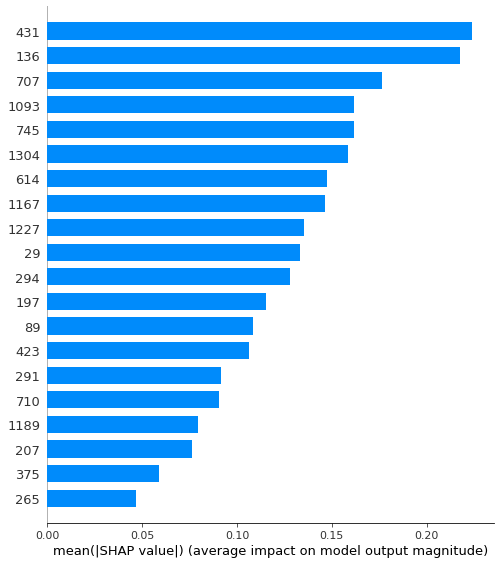

In [16]:
%time
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 20.5 µs


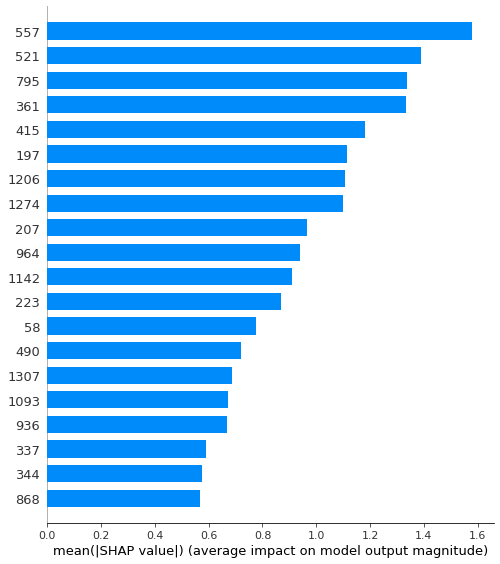

In [17]:
%time
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 24.3 µs


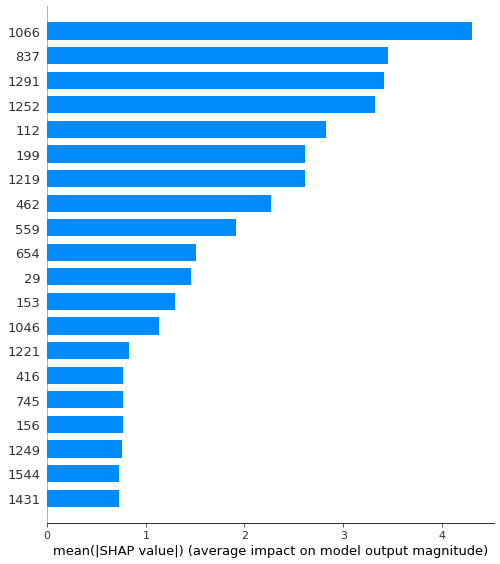

In [18]:
%time
shap.summary_plot(shap_values[2], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 20.3 µs


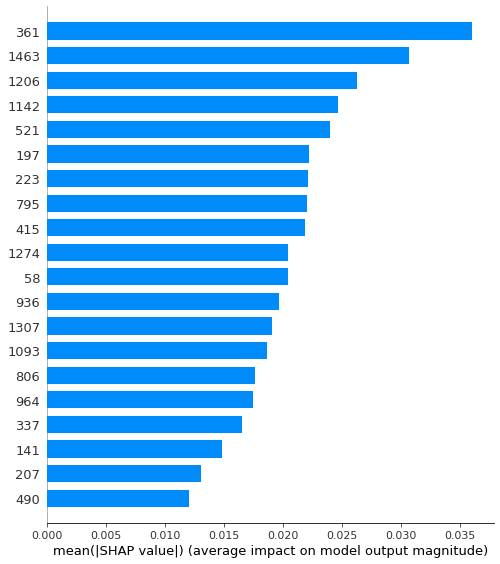

In [19]:
%time
shap.summary_plot(shap_values[3], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 21 µs


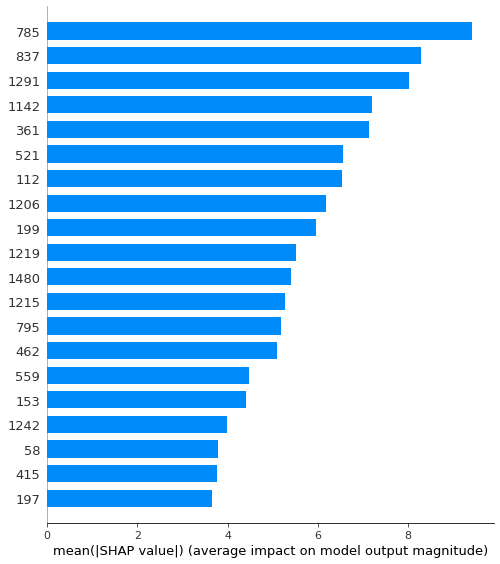

In [20]:
%time
shap.summary_plot(shap_values[4], X_train, plot_type="bar")

CPU times: user 0 ns, sys: 10 µs, total: 10 µs
Wall time: 20 µs


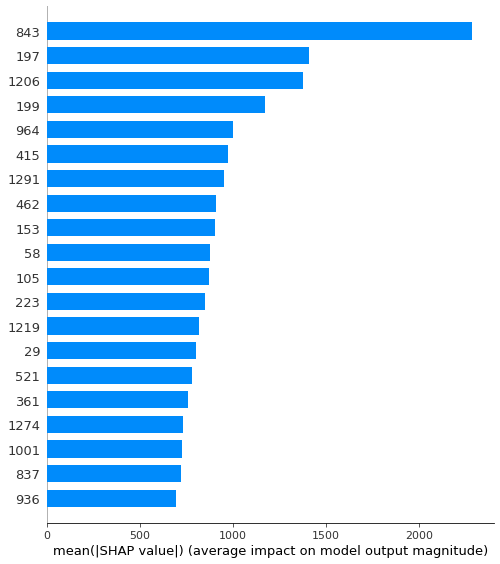

In [21]:
%time
shap.summary_plot(shap_values[5], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 19.8 µs


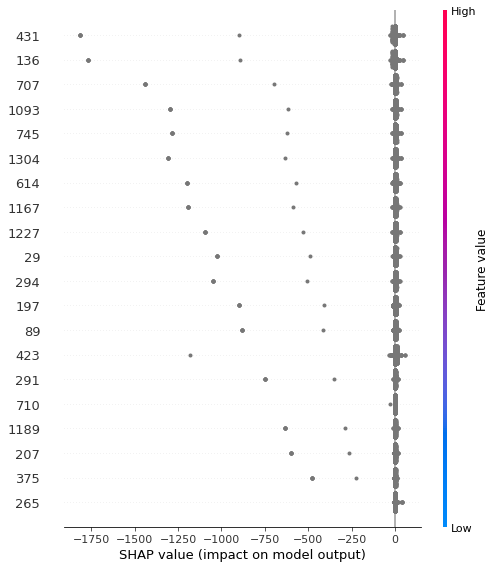

In [22]:
%time
shap.summary_plot(shap_values[0], X_train, feature_names = X_train.columns)

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 24.1 µs


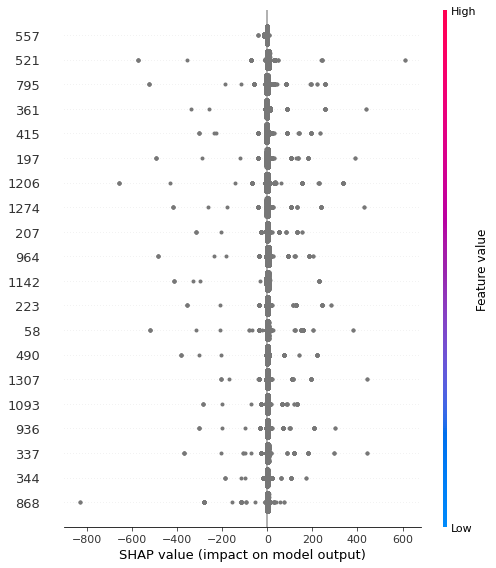

In [23]:
%time
shap.summary_plot(shap_values[1], X_train, feature_names = X_train.columns)

CPU times: user 0 ns, sys: 11 µs, total: 11 µs
Wall time: 23.8 µs


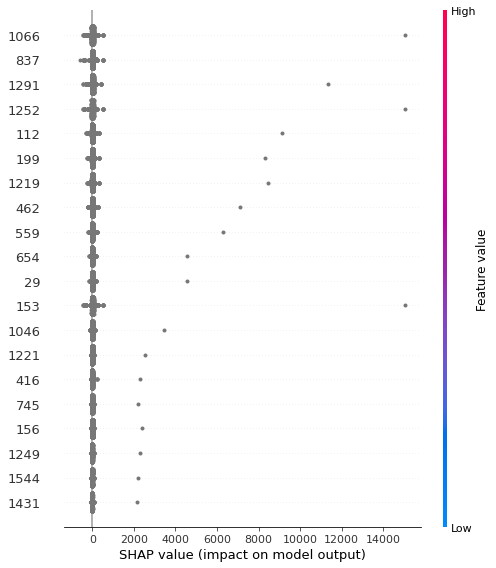

In [24]:
%time
shap.summary_plot(shap_values[2], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 24.1 µs


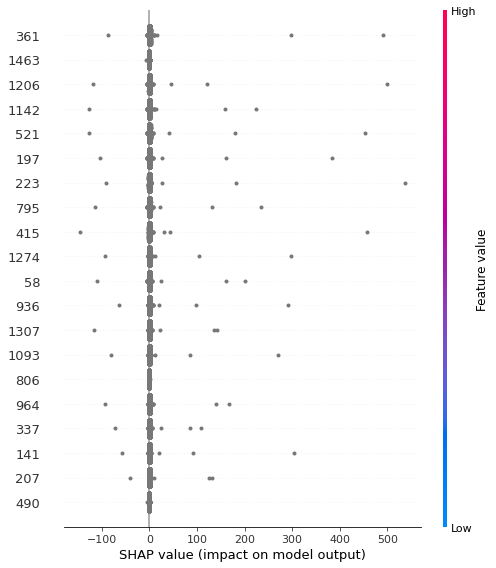

In [25]:
%time
shap.summary_plot(shap_values[3], X_train, feature_names = X_train.columns)

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 20.3 µs


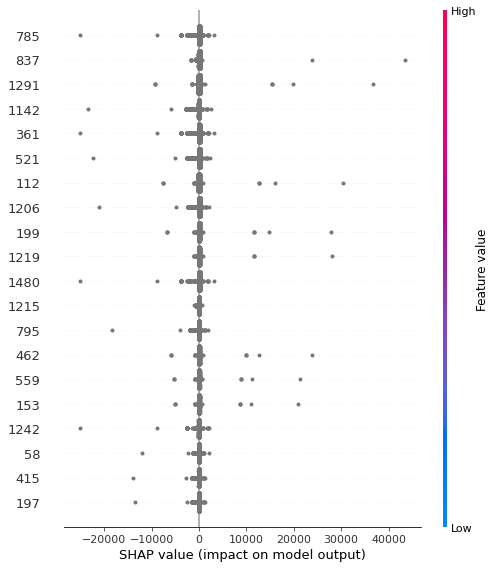

In [26]:
%time
shap.summary_plot(shap_values[4], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 21.5 µs


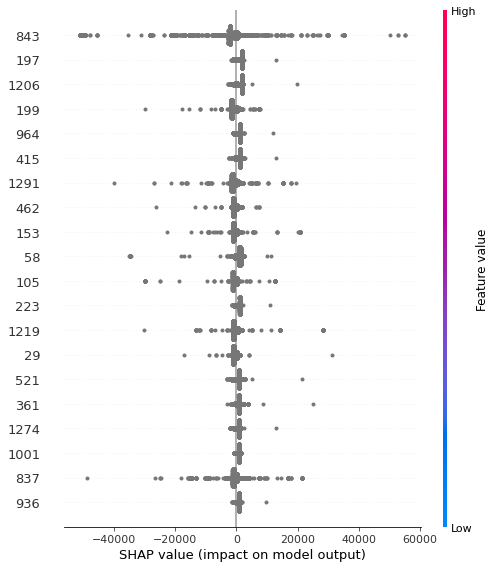

In [27]:
%time
shap.summary_plot(shap_values[5], X_train, feature_names = X_train.columns)

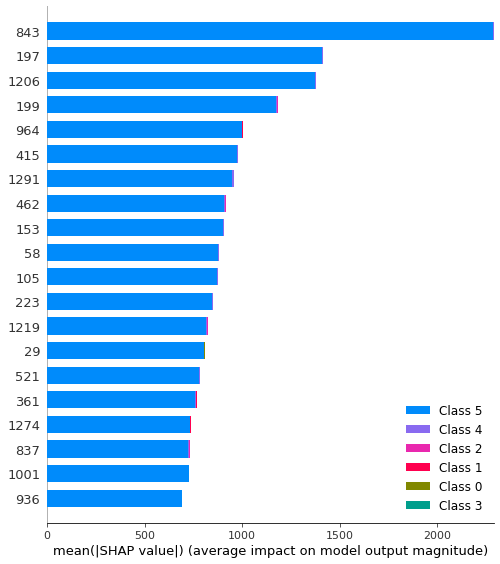

In [28]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [15]:
# Optionally the data can be saved to create a checkpoint - Shap RF

import pickle

# f = open('shap_values_elmo_rf.pckl', 'wb')
# pickle.dump(shap_values, f)
# f.close()

f = open('shap_values_elmo_rf.pckl', 'rb')
shap_values = pickle.load(f)
f.close()